**Árvores de Decisão**, ou **Decision Trees**, são algoritmos de machine learning de aprendizagem de máquina supervisionado e é largamente utilizados, onde ele se baseia na ideia de divisão dos dados em grupos homogêneos e, está técnica pode ser utilizadas em um cenário de classificação ou regressão.

Com uma estrutura de simples compreensão e que costumam apresentar bons resultados em suas previsões. Eles também são a base do funcionamento de outros poderosos algoritmos, como o Random Forest, por exemplo.


fontes:
- https://pt.wikipedia.org/wiki/%C3%81rvore_de_decis%C3%A3o
- https://pt.wikipedia.org/wiki/Coeficiente_de_Gini
- https://edisciplinas.usp.br/pluginfile.php/4469825/mod_resource/content/1/ArvoresDecisao_normalsize.pdf

Porém antes de aplicar o algoritmo, vamos entender de maneira simplificada como se dá sua lógica de funcionamento. Apesar do grande poder de previsão de uma árvore de decisão, conhecer o seu funcionamento básico é algo muito simples e de fácil entendimento.

## Estrutura de uma árvore de decisão

Como o próprio nome sugere, o algoritmo possui pontos de decisão. Onde os pontos são os “nós” da árvore e, em cada um deles o resultado da decisão será seguir por um caminho, ou por outro. 
Os caminhos existentes são os “ramos". Esta é a estrutura básica de uma árvore de decisão. Os nós são responsáveis pelas decisões que irão indicar um ramo ou outro para sequência do fluxo até chegar ao último nível da árvore.

Detalhando ainda mais esta lógica, uma pergunta será feita e teremos duas opções de resposta: sim ou não. A opção “sim” levará a uma próxima pergunta, e a opção “não” a outra. Estas novas perguntas também terão como opções de resposta o sim e não, e desta forma toda a árvore será construída, partindo de um ponto comum, podendo existir várias opções de caminhos diferentes a serem percorridos na árvore, cada um levando a um resultado.

Na imagem abaixo vemos uma árvore de decisão extremamente simples, apenas com dois nós e poucos ramos.

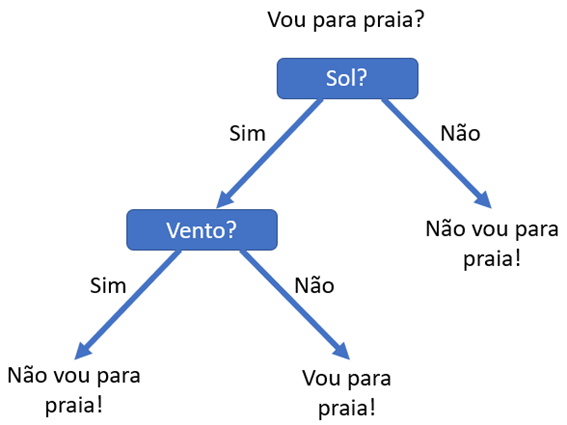

É claro que, em uma situação como esta, não será necessário um algoritmo que nos diga se iremos a praia ou não, mas a ideia é válida para este aprendizado. Entendendo como esta árvore foi criada, você entenderá a lógica de uma árvore de decisão.

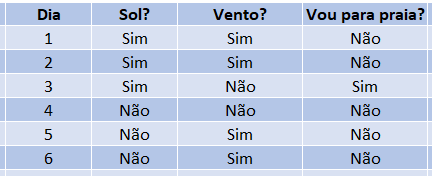

Esta é a tabela que levou à criação da árvore apresentada. Como podemos ver, todas as vezes em que a coluna “Sol?” é igual a “Não”, a pessoa não foi para praia. Esta coluna foi utilizada na primeira pergunta, ou no primeiro nó de nossa árvore, sendo que sempre que a informação na coluna “Sol?” for “Não”, nossa árvore de decisão responderá que a pessoa não foi para praia. Porém quando esta resposta for “Sim”, temos casos onde a pessoa foi para praia e outros em que ela não foi.

Ou seja, é necessário fazermos mais uma pergunta para definirmos a resposta, levando assim a segunda pergunta, ou segundo nó de nossa árvore, que irá conferir a informação existente na coluna “Vento?”.

É importante observamos que esta mesma tabela poderia levar a construção de uma árvore diferente. Se primeiramente conferirmos o valor da variável “Vento?” veremos que em todos os dias com vento não fomos para praia. Em dias sem vento, conferimos também se havia sol, para então definir a resposta final.

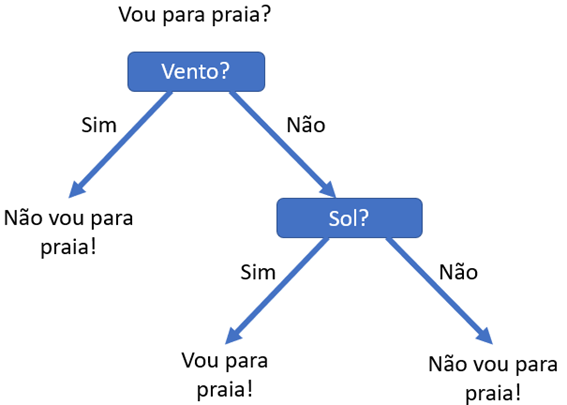

Neste simples exemplo vemos que normalmente não existirá uma única árvore de decisão para um mesmo problema, sendo que com diferentes árvores poderemos chegar a um mesmo resultado.

## Definindo os nós e ramos

Assim como podemos ter mais de uma árvore para um mesmo problema, também podemos utilizar diferentes métodos de cálculo na criação de uma árvore de decisão. Estes métodos são os responsáveis pela definição da estrutura e resultado final da árvore, e tentam buscar a estrutura mais otimizada para o problema em questão.

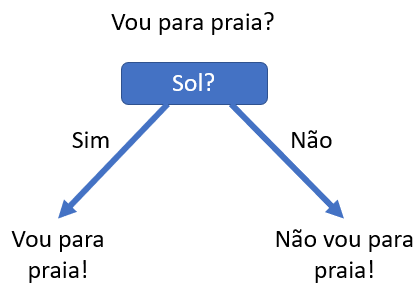

Imagine que em nosso exemplo anterior os dados fossem um pouco diferentes, sendo que em todos os dias de sol fomos para a praia, e em dias sem sol, não fomos. Nesta situação, a árvore não precisaria conferir se existe vento ou não, pois independente desta informação o resultado seria o mesmo. Ou seja, nossa variável target “Vou para praia?” seria totalmente explicada pela variação da variável preditora “Sol?”, resultando em uma árvore com apenas um nó.

Os métodos utilizados pelos algoritmos irão buscar justamente estas variáveis dentre todas as preditoras, identificando aquelas que possuem maior relação com a variável target, e colocando-as no topo da árvore, em seus nós principais.

Estes são alguns dos métodos utilizados para estas definições:

- Entropia – através da entropia o algoritmo verifica como os dados estão distribuídos nas variáveis preditoras de acordo com a variação da variável target. Quanto maior a entropia, maior a desordem dos dados; e quanto menor, maior será a ordem destes dados, quando analisados pela ótica da variável target. Partindo da entropia, o algoritmo confere o ganho de informação de cada variável. Aquela que apresentar maior ganho de informação será a variável do primeiro nó da árvores.
Podemos entender o ganho de informação como a medida de quão bem relacionados os dados da variável preditora estão com os dados da variável target (ou o quanto a variável target pode ser explicada a partir da variável preditora), sendo que a variável com melhor desempenho será a escolhida para iniciar a árvore.

- Índice GINI – com o cálculo do índice GINI, assim como na Entropia, será verificada a distribuição dos dados nas variáveis preditoras de acordo com a variação da variável target, porém com um método diferente. A variável preditora com o menor índice Gini será a escolhida para o nó principal da árvore, pois um baixo valor do índice indica maior ordem na distribuição dos dados.

- Regressão – nos problemas de regressão nosso objetivo é prever um valor, e não uma classe. Para isso a árvore utilizará os conceitos de média e desvio padrão, que possibilitarão um resultado final numérico.
Para definir as variáveis preditoras dos nós principais em um problema de regressão, será calculado o desvio padrão dos valores da variável target para cada variável preditora, de acordo com suas variações. Desta forma teremos um valor de desvio padrão para cada variável preditora e, comparando-o com o desvio padrão da variável target completa, chegaremos a redução de desvio padrão que a variável preditora em questão aplicou sobre a variável target.
Lembrando que o desvio padrão indica o quão distante os valores estão da média, podemos entender que uma variável com grande redução de desvio padrão indica que através dela a variável target se aproxima da média, mostrando uma grande relação entre a variável preditora e a variável target. Portanto, a variável preditora com maior redução de desvio padrão será escolhida para o nó principal da árvore.

**Vamos para a prática!**

In [20]:
# importando a biblioteca
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [21]:
# iremos importar os datasets já embutidos no próprio sklearn
from sklearn.datasets import load_boston, load_iris

In [22]:
# importando a biblioteca para realizar a divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

Primeiramente vamos utilizar a `árvore de classificação` no dataset **load_iris** e, posteriormente iremos aplicar a `árvore de regressão` para o dataset **load_boston**.

In [32]:
# instanciando o classificador - árvore de classificação
dTClass = DecisionTreeClassifier()

In [33]:
# realizando a leitura e instanciando a base de dados
X, y = load_iris(return_X_y=True)

In [34]:
# aplicando a divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
# treinando o modelo
dTClass.fit(X_train, y_train) # valores de treino

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
# avaliando acurácia do modelo
dTClass.score(X_test, y_test)

0.9210526315789473

**O modelo apresenta uma boa acurácia**

Agora iremos aplicar a `árvore de regressão` para o dataset **load_boston**.

In [37]:
# instanciando o classificador - árvore de regressão
dTRegr = DecisionTreeRegressor()

In [38]:
# realizando a leitura e instanciando a base de dados
X, y = load_boston(return_X_y=True)

In [39]:
# aplicando a divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
# treinando o modelo
dTRegr.fit(X_train, y_train) # valores de treino

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
# avaliando acurácia do modelo
dTRegr.score(X_test, y_test)

0.6971314347823943

`E aí, como se saiu o modelo?`

### Há alguns detalhes na utilização da árvore de decisão que devemos se atentar, é um desses detalhes é o `overfitting`.

Mas afinal, o que é o **overfitting**?



Sobre-ajuste ou sobreajuste (do inglês: overfitting) é um termo usado em estatística para descrever quando um modelo estatístico se ajusta muito bem ao conjunto de dados anteriormente observado, mas se mostra ineficaz para prever novos resultados.

É comum que a amostra apresente desvios causados por erros de medição ou fatores aleatórios. Ocorre o sobre-ajuste quando o modelo se ajusta a estes. Um modelo sobre-ajustado apresenta alta precisão quando testado com seu conjunto de dados, porém tal modelo não é uma boa representação da realidade e por isso deve ser evitado. É bem comum que estes modelos apresentem considerável variância e que seus gráficos tenham várias pequenas oscilações, portanto espera-se que modelos representativos sejam convexos.

Uma ferramenta para contornar o problema do sobre-ajuste é a regularização, que adiciona à função custo o valor dos parâmetros. Tal adição resulta na eliminação de parâmetros de pouca importância e, portanto, em um modelo mais convexo, do qual que se espera que seja mais representativo da realidade. Através da validação cruzada, em que testamos o nosso modelo em relação a uma parte reservada do conjunto de dados que não foi utilizada no treino do modelo em questão, é possível se ter uma ideia de se o modelo sofre de sobre-ajuste ou não.

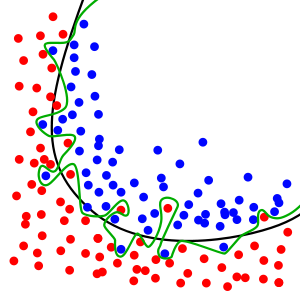

Para mais detalhes, consulte através dos links abaixo.

fontes:
- https://pt.wikipedia.org/wiki/Sobreajuste
- https://pt.stackoverflow.com/questions/377643/o-que-%C3%A9-overfitting-e-underfitting-em-machine-learning
- https://abracd.org/overfitting-e-underfitting-em-machine-learning/


O sobre-ajuste é quando o modelo tem uma acurácia alta na base de dados já conhecida, porém quando aplicamos o modelo em conjunto de dados que ele nunca viu o modelo apresenta baixa performance.
O importante é que o modelo possa generalizare, assim ter uma performance aceitável para dados desconhecidos.

Simplificando esse conceito! Vamos realizar uma analogia.

Por exemplo quando você somente estuda um conjunto de questões para a prova - na verdade você simplesmente decora as respostas. E no exame, as questões aplicadas são totalmente diferentes do que você estudou. Portanto, você não consegui generalizar o seu conhecimento!

Para evitar esse tipo de comportamento do classificador temos algumas técnicas que pode ser aplicado para amenizar esse tipo de ocorrência.



Iremos utilizar um limitador para aplicação das regras da árvore.

Iremos `podar` a árvore!

In [42]:
# aplicando parâmetro de "poda" da árvore
dTClass = DecisionTreeClassifier(max_depth=5)
# "max_depth=5" - definimos que a árvore terá altura de 5 nós

In [43]:
# realizando a leitura e instanciando a base de dados
X, y = load_iris(return_X_y=True)

In [44]:
# aplicando a divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
# treinando o modelo
dTClass.fit(X_train, y_train) # valores de treino

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
# avaliando acurácia do modelo
dTClass.score(X_test, y_test)

0.9210526315789473

### Vamos novamente limitar a altura da árvore agora somente com `3 nós`

In [48]:
# aplicando noamente a "poda" da árvore
dTClass = DecisionTreeClassifier(max_depth=3)
# "max_depth=5" - definimos que a árvore terá altura de 3 nós

In [49]:
# realizando a leitura e instanciando a base de dados
X, y = load_iris(return_X_y=True)

In [50]:
# aplicando a divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [51]:
# treinando o modelo
dTClass.fit(X_train, y_train) # valores de treino

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
# avaliando acurácia do modelo
dTClass.score(X_test, y_test)

0.9736842105263158

**Perceba que, diminuímos a altura da árvore e, o modelo obteve uma melhor acurácia**

## Selecionando features com `árvores de decisão`

Para essa atividade iremos utilizar outro dataset:
- `load_breast_cancer` - conjunto de dados de câncer de mama.

In [75]:
# importando as bibliotecas necessárias e o dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [76]:
# instanciando o classificador
dTClass = DecisionTreeClassifier()

**Poderíamos também definir a quantidade de nós, porém aqui queremos somente exemplificar a capacidade da árvore de decisão retornar a importância das features**

In [81]:
# realizando a leitura e instanciando a base de dados
X, y = load_breast_cancer(return_X_y=True)

Nesse exemplo não será aplicada a técnica de divisão do dataset em treino e teste.

Aqui só entender `por debaixo dos panos` como funciona a capacidade do modelo.

In [82]:
# treinando o modelo
dTClass.fit(X, y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
# quantidade de linhas e colunas
X.shape

(569, 30)

Perceba que, este conjunto possui 30 colunas e, isto talvez não possa ter importância para o modelo.

Para sabermos o quanto cada coluna é importante aplicaremos a técnica...

In [84]:
dTClass.feature_importances_

array([0.        , 0.04812326, 0.        , 0.        , 0.00701689,
       0.        , 0.00877112, 0.03184137, 0.        , 0.        ,
       0.        , 0.        , 0.007316  , 0.00204521, 0.00100384,
       0.00689159, 0.        , 0.        , 0.        , 0.00644409,
       0.70123209, 0.0460766 , 0.        , 0.0110859 , 0.00738798,
       0.        , 0.00766716, 0.10709688, 0.        , 0.        ])

Ele retorna a quantidade de colunas e sua importância dos atributos para construção do modelo. Note que, temos colunas com valor de `0`, isto mostra que a coluna em questão possui importância nula para o modelo.

Podemos assim eliminar as features com nenhuma e/ou baixa importância. Porém isto deve ser feito recursivamente, e devemos ir eliminando uma a uma cada das colunas, já que algumas pode ter alguma correlação entre elas e assim prejudicar o modelo como todo.

E assim iremos aplicando o `score` até termos um modelo que apresenta uma performance aceitável.